In [48]:
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import geopandas
import matplotlib.pyplot as plt

In [33]:
m = folium.Map([-25.80, 149.01], zoom_start=9)
boundsdata = r'C:\Users\rossb1\DATA\script_inputs\spring-monitoring\spring_block.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [34]:
user = 'benross' ## change this!
password = 'password' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

POLYGON((149.3779 -25.9922,149.3779 -25.6666,148.6124 -25.6718,148.6267 -25.9870,148.6267 -25.9870,148.6267 -25.9870,149.3779 -25.9922))


52b1a4e6-4dc7-4d53-871c-ea7a63446302    Annotation(148.442, -25.7806, '52b1a4e6-4dc7-4...
99529a92-790a-45e3-88a7-caa1639b11a4    Annotation(149.542, -25.7894, '99529a92-790a-4...
d088d78a-d97e-4c88-9504-1f4b362901be    Annotation(148.724, -25.8332, 'd088d78a-d97e-4...
aca0439c-d244-453f-b692-f2e418379208    Annotation(148.441, -25.7805, 'aca0439c-d244-4...
dtype: object

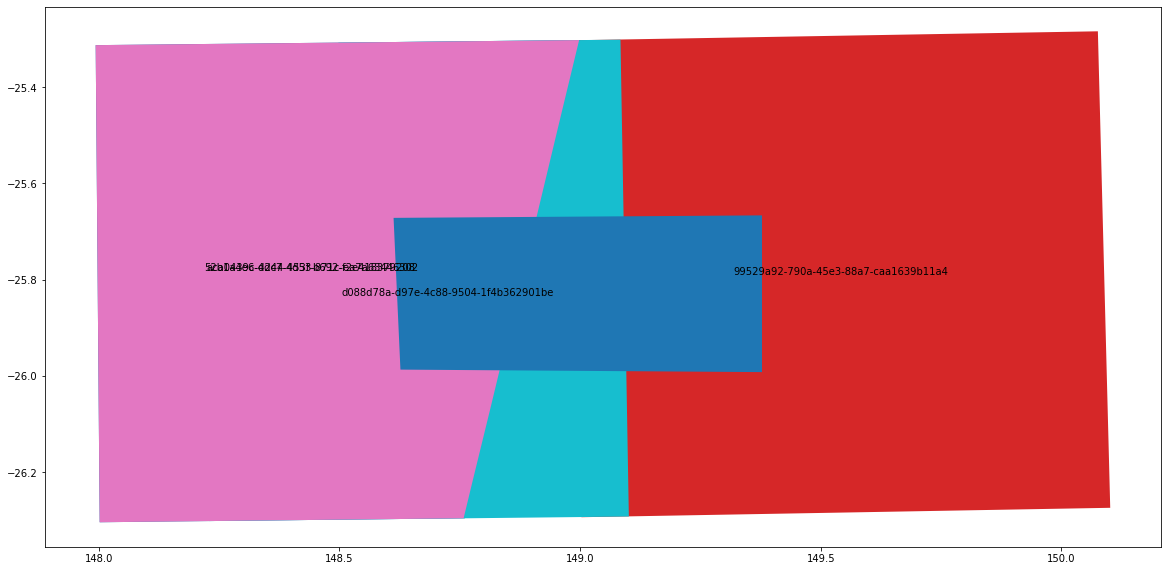

In [62]:
products = api.query(footprint,
                     date = ('20190220', '20190227'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

gdf2 = geopandas.read_file(boundsdata)

areas = api.to_geodataframe(products)
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
gdf2.plot(ax=ax)
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)